____
__Universidad Tecnológica Nacional, Buenos Aires__ <br>
__Ingeniería Industrial__ <br>
__Autor: Martin Palazzo__ <br>
__Cátedra de Investigación Operativa - Curso I4051 - Turno Miércoles Noche__ <br>
____

### **Importamos librerias**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as st
import seaborn as sns
import math
from scipy import stats
from scipy.special import factorial

En la celda de abajo creo la variable lambda y le asigno el valor 0.3333

### Comparar la estimación de lambda empiricamente:
- Analiticamente con MLE
- Utilizando la librería de scipy .fit()

Creamos vectores vacios con ceros que contengan la cantidad de iteraciones que vamos a samplear. En estos vectores vamos a guardar el lambda estimado de una distribucion exponencial con la cantidad de muestras disponibles hasta el momento (de menos a mas). <br>
Vamos a generar datos sinteticos partiendo de un beta determinado (recordemos que lambda = 1/beta).

In [2]:
lambda_empirico_ = np.zeros(100)
lambda_scipy_ = np.zeros(100)

In [3]:
# contador de iteraciones
iteration = 0

# iteramos desde 5 a 1005 con saltos de a 10
for samples in range(5,1005,10):
    
    # defino beta
    beta = 0.5 # tiempo medio entre eventos -> inventado y arbitrario
    # por cada iteracion genero un valor aleatorio sampleado de una exponencial
    data_t_eventos = np.random.exponential(beta,samples)
    
    # alternativa 01: scipy
    # ajusto/fiteo los valores sampleados desde el inicio hasta la iteracion actual con scipy stats (st)
    _ar , beta_ = st.expon.fit(data_t_eventos)
    # con el beta obtenido calculo el lambda estimado
    lambda_scipy_[iteration] = 1/beta_

    # alternativa 02: metodo analitico
    # ajusto/fiteo los valores sampleados desde el inicio hasta la iteracion actual con el metodo analitico
    lambda_empirico_[iteration] = 1/(np.sum(data_t_eventos)/np.shape(data_t_eventos)[0])
    
    iteration += 1

#### visualizamos como quedaron las estimaciones de lambda utilizando distinta cantidad de muestreos (iteraciones)

Text(0.5, 0, 'Cantidad de muestreos')

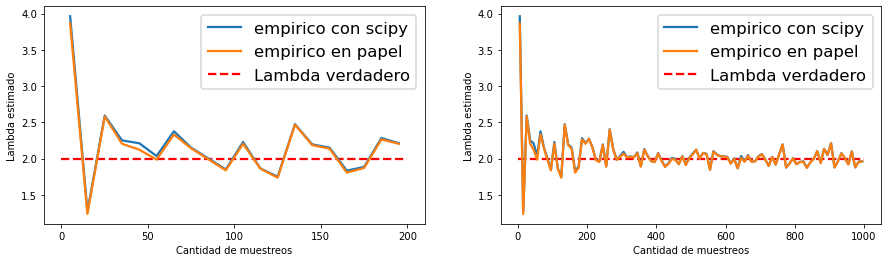

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15,4))
sns.set_context("talk", font_scale=1)

axs[0].plot(np.arange(5,205,10),lambda_scipy_[:20], label = 'empirico con scipy')
axs[0].plot(np.arange(5,205,10),lambda_empirico_[:20], label = 'empirico en papel')
axs[0].hlines(2,0,200, linestyles = '--', colors = 'r', label = 'Lambda verdadero')
axs[0].legend()
axs[0].set_ylabel('Lambda estimado')
axs[0].set_xlabel('Cantidad de muestreos')


axs[1].plot(np.arange(5,1005,10),lambda_scipy_, label = 'empirico con scipy')
axs[1].plot(np.arange(5,1005,10),lambda_empirico_, label = 'empirico en papel')
axs[1].hlines(2,0,1000, linestyles = '--', colors = 'r', label = 'Lambda verdadero')
axs[1].legend()
axs[1].set_ylabel('Lambda estimado')
axs[1].set_xlabel('Cantidad de muestreos')
#plt.yscale('log')

# Ejercicio caso mantenimiento 

Una empresa que fabrica componentes electrónicos con miles de equipos automáticos de producción. Estos equipos eventualmente fallan y deben recibir mantenimiento.

Cuando un equipo sale de funcionamiento, la empresa se perjudica a razón de $60/(hora-no-funcionamiento).

Los estándares de calidad solicitan que un equipo no debe estar fuera de operación más de 2 horas.

El costo total de mantenimiento no puede exceder los 140$/hora.

Hay una sola unidad de reparación.


### Especificaciones de las alternativas disponibles
Para eso se decide analizar la situación actual y analizar alternativas de servicios de otras unidades de negocios así determinar cuál es la mejor opción:

##### Situación Actual -> servicio 0
El service cuesta $10/hora
Se disponen de 20 mediciones de tiempo entre reparaciones

##### Alternativas -> servicio 1
El service cuesta $140/hora
Se disponen de 20 mediciones de tiempo entre reparaciones

##### Alternativas -> servicio 2
El service cuesta $80/hora
Se disponen de 20 mediciones de tiempo entre reparaciones

**Se solicita determinar cuál opción deberá implementarse.**


### Definir el dataset

In [6]:
#random.seed(10)

#data_t_arribos0 = np.random.exponential(0.95,20)
#data_t_despachos0 = np.random.exponential(0.65,20)
#data_t_despachos1 = np.random.exponential(0.3,20)
#data_t_despachos2 = np.random.exponential(0.5,20)

In [7]:
# datos de tiempos entre arribos y despachos de cada alternativa. 
# Cada valor es el tiempo entre eventos.
# la funcion np.round(####,2) -> redondea a 2 decimales

data_t_arribos0 = np.round(np.array([1.0231844 , 1.77434805, 1.53301843, 1.18304619, 3.20198487,  
                                     5.01952113, 0.08748119, 1.36024396, 2.07532097, 0.1055738 ,   
                                     1.28187053, 0.18858918, 0.40843211, 0.62698395, 0.40173044,  
                                     0.90572198, 0.23248581, 1.2637668 , 0.94326258, 0.5595356 ]),2)

data_t_despachos0 = np.round(np.array([0.64678424, 0.7352942 , 0.35635727, 2.24495895, 0.27403808,  
                                       0.34332001, 2.86247636, 0.3926639 , 0.36810183, 0.13677444,   
                                       1.68279607, 0.25585313, 0.77842311, 0.03803348, 0.14525909,  
                                       0.91350541, 1.3119555 , 0.63966832, 1.47489907, 0.69505425]),2)

data_t_despachos1 = np.round(np.array([0.08721347, 0.60686908, 0.56978768, 0.63303402, 0.47337649,  
                                       0.65437408, 0.39364793, 0.39883699, 0.46069296, 0.20590394,  
                                       0.56815075, 0.51800932, 0.09647649, 0.14966022, 0.14471276,   
                                       0.55156955, 0.31489518, 0.13833991, 0.3221457 , 0.15861389]),2)

data_t_despachos2 = np.round(np.array([0.07661233, 0.34649401, 1.11626137, 0.03869961, 0.58650448,  
                                       0.61918351, 0.39873432, 0.25499554, 0.31895109, 0.26566259,  
                                       0.20800108, 0.3056572 , 0.65795425, 0.11508767, 0.56316369,  
                                       0.30655145, 0.1818267 , 1.24206752, 1.71057829, 0.06073449]),2)

In [8]:
print('Datos de tiempo entre arribos')
data_t_arribos0

Datos de tiempo entre arribos


array([1.02, 1.77, 1.53, 1.18, 3.2 , 5.02, 0.09, 1.36, 2.08, 0.11, 1.28,
       0.19, 0.41, 0.63, 0.4 , 0.91, 0.23, 1.26, 0.94, 0.56])

In [9]:
print('Datos de tiempo entre despachos 0')
data_t_despachos0

Datos de tiempo entre despachos 0


array([0.65, 0.74, 0.36, 2.24, 0.27, 0.34, 2.86, 0.39, 0.37, 0.14, 1.68,
       0.26, 0.78, 0.04, 0.15, 0.91, 1.31, 0.64, 1.47, 0.7 ])

In [10]:
print('Datos de tiempo entre despachos 1')
data_t_despachos1

Datos de tiempo entre despachos 1


array([0.09, 0.61, 0.57, 0.63, 0.47, 0.65, 0.39, 0.4 , 0.46, 0.21, 0.57,
       0.52, 0.1 , 0.15, 0.14, 0.55, 0.31, 0.14, 0.32, 0.16])

In [11]:
print('Datos de tiempo entre despachos 2')
data_t_despachos2

Datos de tiempo entre despachos 2


array([0.08, 0.35, 1.12, 0.04, 0.59, 0.62, 0.4 , 0.25, 0.32, 0.27, 0.21,
       0.31, 0.66, 0.12, 0.56, 0.31, 0.18, 1.24, 1.71, 0.06])

#### **Estimamos los parametros lambda y mu de cada caso utilizando los datos obtenidos mediante el metodo analitico**

In [12]:
# calculamos los parametros de las distribuciones exponenciales DESDE los datos con 
# la ecuacion de maxima verosimilitud
lambda_empirico_arribos0 = 1/(np.sum(data_t_arribos0)/np.shape(data_t_arribos0)[0])
mu_empirico_despachos0 = 1/(np.sum(data_t_despachos0)/np.shape(data_t_despachos0)[0])
mu_empirico_despachos1 = 1/(np.sum(data_t_despachos1)/np.shape(data_t_despachos1)[0])
mu_empirico_despachos2 = 1/(np.sum(data_t_despachos2)/np.shape(data_t_despachos2)[0])

# calculamos la cantidad de canales
M = 1

#### **Visualizamos el tiempo entre arribos y despachos obtenido de las mediciones realizadas**

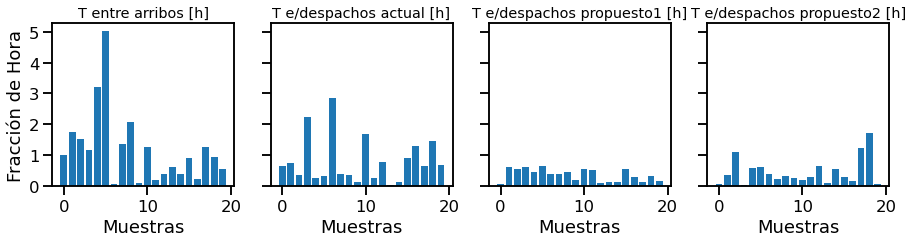

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(15,3), sharey=True)
sns.set_context("talk", font_scale=0.8)

axs[0].bar(range(0,20),data_t_arribos0)
axs[0].set_title('T entre arribos [h]')
axs[0].set_ylabel('Fracción de Hora')
axs[0].set_xlabel('Muestras')

axs[1].bar(range(0,20),data_t_despachos0)
axs[1].set_title('T e/despachos actual [h]')
axs[1].set_xlabel('Muestras')

axs[2].bar(range(0,20),data_t_despachos1)
axs[2].set_title('T e/despachos propuesto1 [h]')
axs[2].set_xlabel('Muestras')

axs[3].bar(range(0,20),data_t_despachos2)
axs[3].set_title('T e/despachos propuesto2 [h]')
axs[3].set_xlabel('Muestras')

plt.show()

#### **Hacemos un histograma de frecuencias de tiempo entre eventos tanto para arribos como despachos**

/home/human/anaconda3/envs/docto/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


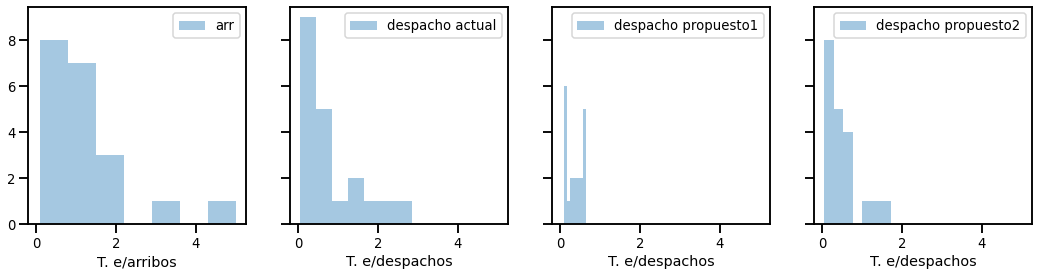

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(18,4), sharey=True, sharex = True)
sns.set_context("talk", font_scale=0.8)

sns.distplot(data_t_arribos0, label = 'arr', kde = False, bins = 7, ax = axs[0],)
sns.distplot(data_t_despachos0, label = 'despacho actual', kde = False, bins = 7, ax = axs[1])
sns.distplot(data_t_despachos1, label = 'despacho propuesto1', kde = False, bins = 7, ax = axs[2])
sns.distplot(data_t_despachos2, label = 'despacho propuesto2', kde = False, bins = 7, ax = axs[3])
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[0].set_xlabel('T. e/arribos')
axs[1].set_xlabel('T. e/despachos')
axs[2].set_xlabel('T. e/despachos')
axs[3].set_xlabel('T. e/despachos')
plt.show()

In [15]:
print('Lambda arribos 0 estimado = ' +str(lambda_empirico_arribos0))

Lambda arribos 0 estimado = 0.8274720728175423


In [16]:
print('Mu arribos actual estimado = ' +str(mu_empirico_despachos0))

Mu arribos actual estimado = 1.2269938650306749


In [17]:
print('Mu arribos propuesto estimado1 = ' +str(mu_empirico_despachos1))

Mu arribos propuesto estimado1 = 2.6881720430107525


In [18]:
print('Mu arribos propuesto estimado2 = ' +str(mu_empirico_despachos2))

Mu arribos propuesto estimado2 = 2.127659574468085


### **Definimos parametros importantes**

In [19]:
# cantidad de canales
M = 1

# costo operativo de 1 canal caso 0
cm0 = 10
# costo operativo de 1 canal caso 1
cm1 = 140
# costo operativo de 1 canal caso 2
cm2 = 80
# costo de oportunidad por cada unidad no despachada
e0 = 60

In [43]:
# Formulas M=1 escritas como funciones de python

def factor_trafico(M,lam,mu):
    return lam/(mu*M)

def proba_vacio (M,lam,mu):
    return 1-(lam/(mu*M))
        
def proba_estado(M,lam,mu,n, P0):
    return ((lam/(mu*M))**n)*P0
    
    
def cantidad_fila(lam,mu):
    return (lam**2)/(mu*(mu-lam))

def tiempo_fila(lam,mu):
    return (lam)/(mu*(mu-lam))

def cantidad_sistema(lam,mu):
    return ((lam/(mu*M))/(1-(lam/(mu*M))))

def tiempo_sistema(lam,mu):
    return ((1/(mu-lam)))

def costo_oportunidad(e, ws, lam):
    return e*ws*lam

def costo_operativo(cm):
    return cm

### Cálculo de métricas de filas de espera para M = 1 
#### **Escenario 0**

In [20]:
# con las funciones definidas calculamos las metricas de interes para el caso 0
ro_0 = factor_trafico(M,lambda_empirico_arribos0,mu_empirico_despachos0)
P0_0 = proba_vacio(M,lambda_empirico_arribos0,mu_empirico_despachos0)
lq_0 = cantidad_fila(lambda_empirico_arribos0,mu_empirico_despachos0)
wq_0 = tiempo_fila(lambda_empirico_arribos0,mu_empirico_despachos0)
ls_0 = cantidad_sistema(lambda_empirico_arribos0,mu_empirico_despachos0)
ws_0 = tiempo_sistema(lambda_empirico_arribos0,mu_empirico_despachos0)

In [21]:
# calculamos el la probabilidad de que el sistema este vacio y la guardamos en la 1er posicion del vector de proba
# en este caso calculamos solo la proba de los primeros 10 estados
vector_proba = np.zeros((10,1))
vector_proba[0,0] = 1 - ro_0

In [22]:
# el resto de las probabilidades de estado la calculamos con la funcion probai_estado

for i in range(1, np.shape(vector_proba)[0]):
    
    # en cada iteracion del ciclo for calculamos una probabilidad de estado
    vector_proba[i,0] = proba_estado(M,lambda_empirico_arribos0,mu_empirico_despachos0,i, P0_0)

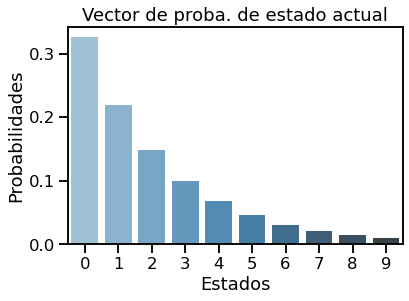

In [44]:
# visualizamos la proba de estado con un seaborn barplot
ax = sns.barplot(x = np.arange(np.shape(vector_proba)[0]), y=vector_proba[:,0],palette="Blues_d")
plt.title('Vector de proba. de estado actual')
plt.ylabel('Probabilidades')
plt.xlabel('Estados')
plt.show()

In [24]:
# imprimimos en pantalla las metricas de interes 

print('Rho 0 = ' +str(ro_0))
print('Wq 0 =' + str(wq_0))
print('Ls 0 =' + str(lq_0))
print('Ws 0 =' + str(ws_0))

Rho 0 = 0.674389739346297
Wq 0 =1.6879923761118163
Ls 0 =1.396766550361453
Ws 0 =2.5029923761118162


In [25]:
# calculamos los costos operativos y de oportunidad para M = 1 

c_opo0 = costo_oportunidad(e0, ws_0, lambda_empirico_arribos0)
c_ope0 = costo_operativo(cm0)
c_tot0 = c_opo0 + c_ope0

In [26]:
print('Costo Oportunidad = ' +str(c_opo0))
print('Costo Operativo = ' +str(c_ope0))
print('Costo Total = ' + str(c_tot0))

Costo Oportunidad = 124.269377382465
Costo Operativo = 10
Costo Total = 134.269377382465


### Cálculo de métricas de filas de espera para M = 1 
#### **Escenario 1**

In [27]:
# con las funciones definidas calculamos las metricas de interes para el caso 1
ro_1 = factor_trafico(M,lambda_empirico_arribos0,mu_empirico_despachos1)
P0_1 = proba_vacio(M,lambda_empirico_arribos0,mu_empirico_despachos1)
lq_1 = cantidad_fila(lambda_empirico_arribos0,mu_empirico_despachos1)
wq_1 = tiempo_fila(lambda_empirico_arribos0,mu_empirico_despachos1)
ls_1 = cantidad_sistema(lambda_empirico_arribos0,mu_empirico_despachos1)
ws_1 = tiempo_sistema(lambda_empirico_arribos0,mu_empirico_despachos1)

In [28]:
# calculamos el la probabilidad de que el sistema este vacio y la guardamos en la 1er posicion del vector de proba
# en este caso calculamos solo la proba de los primeros 10 estados

vector_proba_1 = np.zeros((10,1))
vector_proba_1[0,0] = 1 - ro_1

for i in range(1, np.shape(vector_proba_1)[0]):
    vector_proba_1[i,0] = proba_estado(M,lambda_empirico_arribos0,mu_empirico_despachos1,i, P0_1)

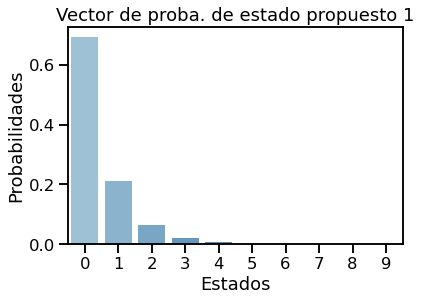

In [46]:
# visualizamos la proba de estado con un seaborn barplot
ax = sns.barplot(x = np.arange(np.shape(vector_proba_1)[0]), y=vector_proba_1[:,0], palette="Blues_d")
plt.title('Vector de proba. de estado propuesto 1')
plt.ylabel('Probabilidades')
plt.xlabel('Estados')
plt.show()

In [30]:
# imprimimos en pantalla las metricas de interes 
print('Rho 1 = ' +str(ro_1))
print('Wq 1 =' + str(wq_1))
print('Ls 1 =' + str(lq_1))
print('Ws 1 =' + str(ws_1))

Rho 1 = 0.3078196110881258
Wq 1 =0.16543215780035864
Ls 1 =0.1368904905257415
Ws 1 =0.5374321578003587


In [31]:
# calculamos los costos operativos y de oportunidad para M = 1 

c_opo1 = costo_oportunidad(e0, ws_1, lambda_empirico_arribos0)
c_ope1 = costo_operativo(cm1)
c_tot1 = c_opo1 + c_ope1

In [32]:
print('Costo Oportunidad = ' +str(c_opo1))
print('Costo Operativo = ' +str(c_ope1))
print('Costo Total = ' + str(c_tot1))

Costo Oportunidad = 26.68260609683204
Costo Operativo = 140
Costo Total = 166.68260609683205


### Cálculo de métricas de filas de espera para M = 1 
#### **Escenario 2**

In [33]:
# con las funciones definidas calculamos las metricas de interes para el caso 2

ro_2 = factor_trafico(M,lambda_empirico_arribos0,mu_empirico_despachos2)
P0_2 = proba_vacio(M,lambda_empirico_arribos0,mu_empirico_despachos2)
lq_2 = cantidad_fila(lambda_empirico_arribos0,mu_empirico_despachos2)
wq_2 = tiempo_fila(lambda_empirico_arribos0,mu_empirico_despachos2)
ls_2 = cantidad_sistema(lambda_empirico_arribos0,mu_empirico_despachos2)
ws_2 = tiempo_sistema(lambda_empirico_arribos0,mu_empirico_despachos2)

In [34]:
vector_proba_2 = np.zeros((10,1))
vector_proba_2[0,0] = 1 - ro_2

for i in range(1, np.shape(vector_proba_2)[0]):
    vector_proba_2[i,0] = proba_estado(M,lambda_empirico_arribos0,mu_empirico_despachos2,i, P0_2)

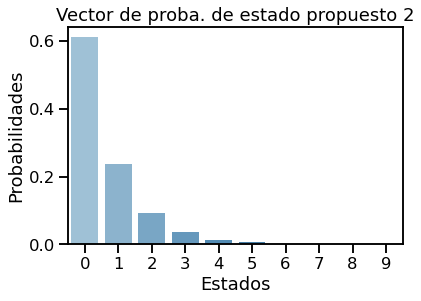

In [47]:
ax = sns.barplot(x = np.arange(np.shape(vector_proba_2)[0]), y=vector_proba_2[:,0], palette="Blues_d")
plt.title('Vector de proba. de estado propuesto 2')
plt.ylabel('Probabilidades')
plt.xlabel('Estados')
plt.show()

In [36]:
print('Rho 2 = ' +str(ro_2))
print('Wq 2 =' + str(wq_2))
print('Ls 2 =' + str(lq_2))
print('Ws 2 =' + str(ws_2))

Rho 2 = 0.3889118742242449
Wq 2 =0.2991198375084631
Ls 2 =0.24751331196397441
Ws 2 =0.7691198375084631


In [37]:
c_opo2 = costo_oportunidad(e0, ws_2, lambda_empirico_arribos0)
c_ope2 = costo_operativo(cm2)
c_tot2 = c_opo2 + c_ope2

In [38]:
print('Costo Oportunidad = ' +str(c_opo2))
print('Costo Operativo = ' +str(c_ope2))
print('Costo Total = ' + str(c_tot2))

Costo Oportunidad = 38.185511171293165
Costo Operativo = 80
Costo Total = 118.18551117129317


### **Comparativa entre los tres escenarios**

In [39]:
print('Ws 0 =' + str(ws_0))
print('Ws 1 =' + str(ws_1))
print('Ws 2 =' + str(ws_2))

Ws 0 =2.5029923761118162
Ws 1 =0.5374321578003587
Ws 2 =0.7691198375084631


In [40]:
print('Ctot 0 =' + str(c_tot0))
print('Ctot 1 =' + str(c_tot1))
print('Ctot 2 =' + str(c_tot2))

Ctot 0 =134.269377382465
Ctot 1 =166.68260609683205
Ctot 2 =118.18551117129317


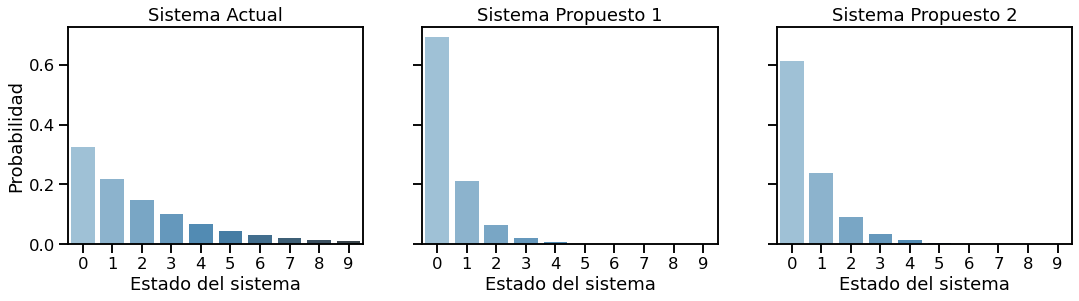

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(18,4), sharey=True, sharex = True)
sns.set_context("talk", font_scale=1)
sns.barplot(x = np.arange(np.shape(vector_proba)[0]), y=vector_proba[:,0], ax = axs[0], palette="Blues_d")
sns.barplot(x = np.arange(np.shape(vector_proba_1)[0]), y=vector_proba_1[:,0], ax = axs[1], palette="Blues_d")
sns.barplot(x = np.arange(np.shape(vector_proba_2)[0]), y=vector_proba_2[:,0], ax = axs[2], palette="Blues_d")
axs[0].set_xlabel('Estado del sistema')
axs[1].set_xlabel('Estado del sistema')
axs[2].set_xlabel('Estado del sistema')
axs[0].set_ylabel('Probabilidad')
axs[0].set_title('Sistema Actual')
axs[1].set_title('Sistema Propuesto 1')
axs[2].set_title('Sistema Propuesto 2')
plt.show()